### Time series

In [1]:
import pandas as pd
df = pd.read_csv('flights-ts.csv.gz')
df.head(3)

,Unnamed: 0,MDW,ORD
0,2000-01-01 00:00:00,NaN,2.0
1,2000-01-01 01:00:00,NaN,6.0
2,2000-01-01 08:00:00,NaN,2.0


In [3]:
df.info()
 # Unnamed: 0  117410 non-null  object  -> string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117410 entries, 0 to 117409
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  117410 non-null  object 
 1   MDW         108511 non-null  float64
 2   ORD         115671 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.7+ MB


In [8]:
# sometimes parse_date works, other times not
df = pd.read_csv('flights-ts.csv.gz', \
                 parse_dates = True, \
                 index_col=0)
df

,MDW,ORD
2000-01-01 00:00:00,NaN,2.0
2000-01-01 01:00:00,NaN,6.0
2000-01-01 08:00:00,NaN,2.0
2000-01-01 09:00:00,1.0,12.0
2000-01-01 10:00:00,6.0,12.0
...,...,...
2015-12-31 20:00:00,18.0,37.0
2015-12-31 21:00:00,2.0,72.0
2015-12-31 22:00:00,13.0,38.0
2015-12-31 23:00:00,12.0,15.0


In [9]:
df.info()
# Unnamed still object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117410 entries, 2000-01-01 00:00:00 to 2016-01-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MDW     108511 non-null  float64
 1   ORD     115671 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB


In [10]:
df.index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               '2000-01-01 10:00:00', '2000-01-01 11:00:00',
               '2000-01-01 12:00:00', '2000-01-01 13:00:00',
               '2000-01-01 14:00:00', '2000-01-01 15:00:00',
               ...
               '2015-12-31 15:00:00', '2015-12-31 16:00:00',
               '2015-12-31 17:00:00', '2015-12-31 18:00:00',
               '2015-12-31 19:00:00', '2015-12-31 20:00:00',
               '2015-12-31 21:00:00', '2015-12-31 22:00:00',
               '2015-12-31 23:00:00', '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', length=117410, freq=None)

In [12]:
df.index = pd.to_datetime(df.index, format = '%Y-%m')
df.index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               '2000-01-01 10:00:00', '2000-01-01 11:00:00',
               '2000-01-01 12:00:00', '2000-01-01 13:00:00',
               '2000-01-01 14:00:00', '2000-01-01 15:00:00',
               ...
               '2015-12-31 15:00:00', '2015-12-31 16:00:00',
               '2015-12-31 17:00:00', '2015-12-31 18:00:00',
               '2015-12-31 19:00:00', '2015-12-31 20:00:00',
               '2015-12-31 21:00:00', '2015-12-31 22:00:00',
               '2015-12-31 23:00:00', '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', length=117410, freq=None)

In [13]:
df.head()

,MDW,ORD
2000-01-01 00:00:00,NaN,2.0
2000-01-01 01:00:00,NaN,6.0
2000-01-01 08:00:00,NaN,2.0
2000-01-01 09:00:00,1.0,12.0
2000-01-01 10:00:00,6.0,12.0


In [14]:
df.max()

MDW     35.0
ORD    110.0
dtype: float64

In [16]:
# get max index
df.idxmax()

MDW   2007-07-26 13:00:00
ORD   2003-08-08 22:00:00
dtype: datetime64[ns]

In [17]:
df.idxmax().dt.day_name()

MDW    Thursday
ORD      Friday
dtype: object

In [20]:
df['2015':'2020']

,MDW,ORD
2015-01-01 00:00:00,9.0,27.0
2015-01-01 01:00:00,4.0,7.0
2015-01-01 02:00:00,NaN,1.0
2015-01-01 03:00:00,NaN,1.0
2015-01-01 07:00:00,NaN,1.0
...,...,...
2015-12-31 20:00:00,18.0,37.0
2015-12-31 21:00:00,2.0,72.0
2015-12-31 22:00:00,13.0,38.0
2015-12-31 23:00:00,12.0,15.0


In [23]:
# extract date year, day
df.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016],
      dtype='int32', length=117410)

In [24]:
df.index.day

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       31, 31, 31, 31, 31, 31, 31, 31, 31,  1],
      dtype='int32', length=117410)

In [25]:
df.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(8, 0), ...,
       datetime.time(22, 0), datetime.time(23, 0), datetime.time(0, 0)],
      dtype=object)

In [26]:
#add a new column 'day'
df['day'] = df.index.day
df

,MDW,ORD,day
2000-01-01 00:00:00,NaN,2.0,1
2000-01-01 01:00:00,NaN,6.0,1
2000-01-01 08:00:00,NaN,2.0,1
2000-01-01 09:00:00,1.0,12.0,1
2000-01-01 10:00:00,6.0,12.0,1
...,...,...,...
2015-12-31 20:00:00,18.0,37.0,31
2015-12-31 21:00:00,2.0,72.0,31
2015-12-31 22:00:00,13.0,38.0,31
2015-12-31 23:00:00,12.0,15.0,31


In [28]:
# first convert day to datetime format 
df.day = pd.to_datetime(df.day, format='%d')

# convert day to name
df['day_name'] = df.day.dt.day_name()
df

,MDW,ORD,day,day_name
2000-01-01 00:00:00,NaN,2.0,1900-01-01,Monday
2000-01-01 01:00:00,NaN,6.0,1900-01-01,Monday
2000-01-01 08:00:00,NaN,2.0,1900-01-01,Monday
2000-01-01 09:00:00,1.0,12.0,1900-01-01,Monday
2000-01-01 10:00:00,6.0,12.0,1900-01-01,Monday
...,...,...,...,...
2015-12-31 20:00:00,18.0,37.0,1900-01-31,Wednesday
2015-12-31 21:00:00,2.0,72.0,1900-01-31,Wednesday
2015-12-31 22:00:00,13.0,38.0,1900-01-31,Wednesday
2015-12-31 23:00:00,12.0,15.0,1900-01-31,Wednesday


In [29]:
# convert to month
df.index = df.index.to_period('M')
df

,MDW,ORD,day,day_name
2000-01,NaN,2.0,1900-01-01,Monday
2000-01,NaN,6.0,1900-01-01,Monday
2000-01,NaN,2.0,1900-01-01,Monday
2000-01,1.0,12.0,1900-01-01,Monday
2000-01,6.0,12.0,1900-01-01,Monday
...,...,...,...,...
2015-12,18.0,37.0,1900-01-31,Wednesday
2015-12,2.0,72.0,1900-01-31,Wednesday
2015-12,13.0,38.0,1900-01-31,Wednesday
2015-12,12.0,15.0,1900-01-31,Wednesday


In [30]:
# add value to index
df.index+5

PeriodIndex(['2000-06', '2000-06', '2000-06', '2000-06', '2000-06', '2000-06',
             '2000-06', '2000-06', '2000-06', '2000-06',
             ...
             '2016-05', '2016-05', '2016-05', '2016-05', '2016-05', '2016-05',
             '2016-05', '2016-05', '2016-05', '2016-06'],
            dtype='period[M]', length=117410)

<Axes: >

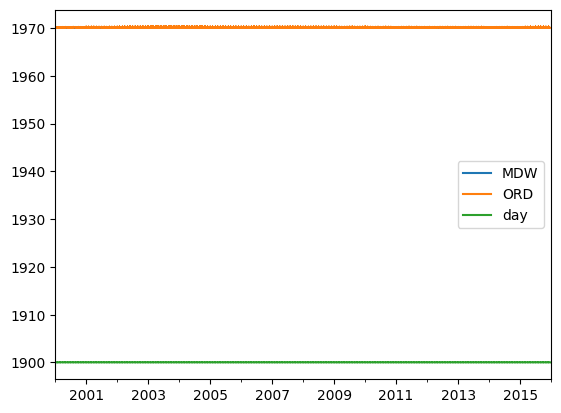

In [31]:
df.plot()

In [39]:
# resample
# df.resample('w').sum()
# day = df.resample('d').agg(['mean', 'std'])

In [43]:
df

,MDW,ORD,day,day_name
2000-01,NaN,2.0,1900-01-01,Monday
2000-01,NaN,6.0,1900-01-01,Monday
2000-01,NaN,2.0,1900-01-01,Monday
2000-01,1.0,12.0,1900-01-01,Monday
2000-01,6.0,12.0,1900-01-01,Monday
...,...,...,...,...
2015-12,18.0,37.0,1900-01-31,Wednesday
2015-12,2.0,72.0,1900-01-31,Wednesday
2015-12,13.0,38.0,1900-01-31,Wednesday
2015-12,12.0,15.0,1900-01-31,Wednesday


In [55]:
a = pd.Timestamp('3/4/2020')
b = pd.Timestamp('3/2/2020')
a-b

Timedelta('2 days 00:00:00')

In [56]:
flts = pd.read_csv('ny-flights.csv.gz', parse_dates=['dep', 'arr'])
flts.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


In [58]:
flts['arr_d_td'] = pd.to_timedelta(flts['arr_delay'], unit = 'minute')
flts

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep,arr_d_td
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00,0 days 00:13:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00,0 days 00:13:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00,0 days 00:09:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00,-1 days +23:34:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00,0 days 00:04:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00,-1 days +23:29:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00,-1 days +23:40:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00,-1 days +23:54:00


In [59]:
flts['arr']+flts['arr_d_td']

0       2014-01-01 12:51:00
1       2014-01-01 15:36:00
2       2014-01-01 22:33:00
3       2014-01-01 09:48:00
4       2014-01-01 17:07:00
                ...        
20812   2014-01-31 09:12:00
20813   2014-01-31 16:18:00
20814   2014-01-31 09:46:00
20815   2014-01-31 11:50:00
20816   2014-01-31 12:32:00
Length: 20817, dtype: datetime64[ns]

In [60]:
flts['arr_d_td'] = pd.to_timedelta(flts['arr_delay'], unit = 'hours')
flts

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep,arr_d_td
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00,0 days 13:00:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00,0 days 13:00:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00,0 days 09:00:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00,-2 days +22:00:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00,0 days 04:00:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00,-2 days +17:00:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00,-1 days +04:00:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00,-1 days +18:00:00
